In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [3]:
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Thinkful_work\Thinkful\Checkpoints
['.ipynb_checkpoints', '1067_1925_bundle_archive.zip', 'Analyzing Model Performance.ipynb', 'Beyond AB Tests Checkpoint.ipynb', 'Building and Analyzing Performance of Multiclass Classifiers.ipynb', 'Case Study Email checkpoint.ipynb', 'Challenge.ipynb', 'Classification Using Linear Classifiers .ipynb', 'Data Cleaning II.ipynb', 'Data Cleaning III.ipynb', 'Data Exploration I.ipynb', 'Data Exploration II.ipynb', 'Evaluating Performance Checkpoint.ipynb', 'Feature Engineering I.ipynb', 'Getting SQL Data into Python.ipynb', 'Interpreting Estimated Coefficients Checkpoint.ipynb', 'Linear Regression Assumptions.ipynb', 'Linear Regression with OLS Assumptions.ipynb', 'Linear Regression with OLS.ipynb', 'Making Predictions Checkpoint.ipynb', 'Model Comparison Challenge.ipynb', 'Overfitting and Regularization Checkpoint.ipynb', 'Performing a T-Test.ipynb', 'Random Forest Challenge.ipynb', 'SQL_DrillsII.sql', 'SQL_Drills

<IPython.core.display.Javascript object>

In [4]:
def eval_preds(y_true, y_pred):
    error = y_true - y_pred

    rmse = np.sqrt((error ** 2).mean())
    mae = error.abs().mean()
    mape = (error / y_true).abs().mean()

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

<IPython.core.display.Javascript object>

In [5]:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [6]:
# Education
# 1 'Below College'
# 2 'College'
# 3 'Bachelor'
# 4 'Master'
# 5 'Doctor'

# EnvironmentSatisfaction
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

# JobInvolvement
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

# JobSatisfaction
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

# PerformanceRating
# 1 'Low'
# 2 'Good'
# 3 'Excellent'
# 4 'Outstanding'

# RelationshipSatisfaction
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

# WorkLifeBalance
# 1 'Bad'
# 2 'Good'
# 3 'Better'
# 4 'Best'

<IPython.core.display.Javascript object>

# EDA

In [7]:
hr_df = pd.read_csv("1067_1925_bundle_archive.zip")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<IPython.core.display.Javascript object>

In [8]:
hr_df.shape

(1470, 35)

<IPython.core.display.Javascript object>

In [9]:
hr_df.isna().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

<IPython.core.display.Javascript object>

In [10]:
hr_df = hr_df.drop(
    columns=[
        "EmployeeCount",
        "EmployeeNumber",
        "Over18",
        "StandardHours",
        "MonthlyRate",
        "DailyRate",
        "HourlyRate",
    ]
)

<IPython.core.display.Javascript object>

In [11]:
hr_df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
hr_df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
hr_df["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
hr_df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
ed_count = hr_df["EducationField"].value_counts()
keep = ed_count[ed_count > 100].index
hr_df = hr_df[hr_df["EducationField"].isin(keep)]

<IPython.core.display.Javascript object>

In [16]:
hr_df["EnvironmentSatisfaction"].value_counts()

3    411
4    409
2    272
1    269
Name: EnvironmentSatisfaction, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
hr_df["Gender"].value_counts()

Male      810
Female    551
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
hr_df["JobInvolvement"].value_counts()

3    809
2    343
4    132
1     77
Name: JobInvolvement, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
hr_df["JobLevel"].value_counts()

1    500
2    493
3    206
4    101
5     61
Name: JobLevel, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
hr_df["JobRole"].value_counts()

Sales Executive              313
Research Scientist           275
Laboratory Technician        237
Manufacturing Director       138
Healthcare Representative    122
Manager                       91
Sales Representative          81
Research Director             76
Human Resources               28
Name: JobRole, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
hr_df["JobSatisfaction"].value_counts()

4    424
3    414
1    267
2    256
Name: JobSatisfaction, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
hr_df["MaritalStatus"].value_counts()

Married     619
Single      441
Divorced    301
Name: MaritalStatus, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
hr_df["OverTime"].value_counts()

No     980
Yes    381
Name: OverTime, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
hr_df["PerformanceRating"].value_counts()

3    1152
4     209
Name: PerformanceRating, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
hr_df["RelationshipSatisfaction"].value_counts()

3    422
4    401
2    282
1    256
Name: RelationshipSatisfaction, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
hr_df["StockOptionLevel"].value_counts()

0    581
1    550
2    151
3     79
Name: StockOptionLevel, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
hr_df["WorkLifeBalance"].value_counts()

3    826
2    321
4    139
1     75
Name: WorkLifeBalance, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
cat_cols = [
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "EnvironmentSatisfaction",
    "Gender",
    "JobInvolvement",
    "JobLevel",
    "JobRole",
    "JobSatisfaction",
    "MaritalStatus",
    "OverTime",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",
]
drop_cats = [
    "Travel_Rarely",
    "Research & Development",
    3,
    "Life Sciences",
    3,
    "Male",
    3,
    1,
    "Sales Executive",
    4,
    "Married",
    "No",
    3,
    3,
    0,
    3,
]
num_cols = [
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TrainingTimesLastYear",
    "YearsAtCompany",
]

<IPython.core.display.Javascript object>

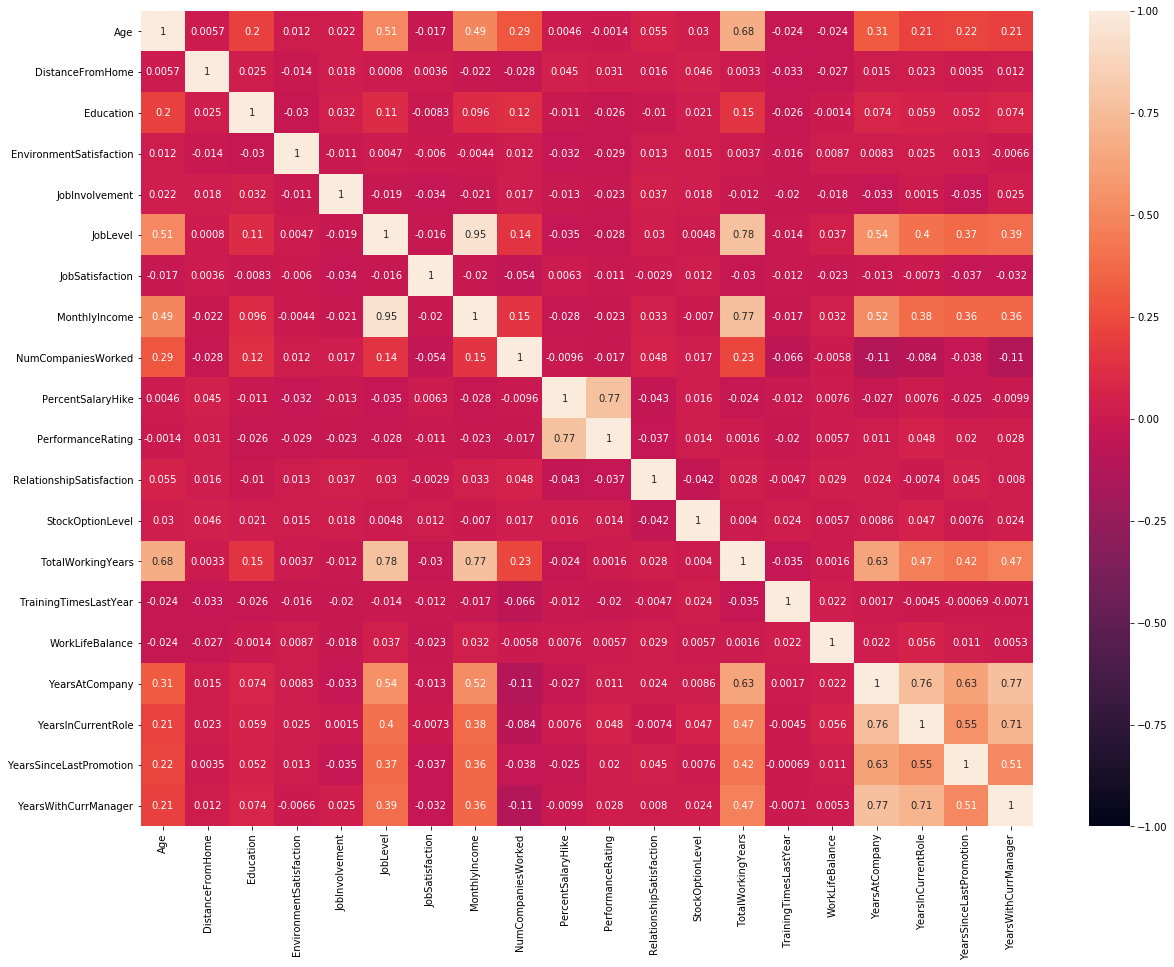

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(hr_df.corr(), vmin=-1, vmax=1, annot=True)

In [30]:
hr_df = pd.get_dummies(hr_df, columns=["Attrition",], drop_first=True,)

<IPython.core.display.Javascript object>

In [31]:
hr_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2,0
5,32,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,1,Laboratory Technician,4,Single,3068,0,No,13,3,3,0,8,2,2,7,7,3,6,0


<IPython.core.display.Javascript object>

# KNN Regression

In [32]:
X = hr_df.drop(
    columns=[
        "Attrition_Yes",
        "TotalWorkingYears",
        "YearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
    ]
)
y = hr_df["Attrition_Yes"]

<IPython.core.display.Javascript object>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13
)

<IPython.core.display.Javascript object>

In [34]:
preprocessing = ColumnTransformer(
    [
        ("dummy", OneHotEncoder(drop=drop_cats), cat_cols),
        ("scale", StandardScaler(), num_cols),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [35]:
pipeline = Pipeline([("preprocessing", preprocessing), ("knn", KNeighborsRegressor())])

<IPython.core.display.Javascript object>

In [36]:
ks = np.arange(1, 100, 2)
rmses = []

for k in ks:
    pipeline.named_steps["knn"].n_neighbors = k
    neg_rmses = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_root_mean_squared_error"
    )
    avg_rmse = np.mean(-neg_rmses)
    rmses.append(avg_rmse)

<IPython.core.display.Javascript object>

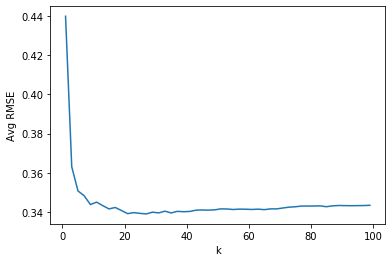

<IPython.core.display.Javascript object>

In [37]:
plt.plot(ks, rmses)
plt.xlabel("k")
plt.ylabel("Avg RMSE")
plt.show()

In [38]:
grid = {"knn__n_neighbors": np.arange(1, 100, 4)}
model = GridSearchCV(pipeline, grid)
model.fit(X_train, y_train)

model.best_params_

{'knn__n_neighbors': 21}

<IPython.core.display.Javascript object>

In [39]:
model.score(X_train, y_train)

0.1897100040844495

<IPython.core.display.Javascript object>

In [40]:
model.score(X_test, y_test)

0.07164727752963052

<IPython.core.display.Javascript object>

In [41]:
y_pred = model.predict(X_test)

resid = y_pred - y_test

<IPython.core.display.Javascript object>

In [42]:
eval_preds(y_test, y_pred)

rmse 0.38
mae 0.25
mape inf


<IPython.core.display.Javascript object>

# OLS Regression

In [43]:
X.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
dtype: object

<IPython.core.display.Javascript object>

In [44]:
hr_df = pd.get_dummies(
    hr_df,
    columns=[
        "BusinessTravel",
        "Department",
        "EducationField",
        "Gender",
        "JobRole",
        "MaritalStatus",
        "OverTime",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [45]:
X = hr_df.drop(
    columns=[
        "Attrition_Yes",
        "TotalWorkingYears",
        "YearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
    ]
)
y = hr_df["Attrition_Yes"]


<IPython.core.display.Javascript object>

In [46]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     12.23
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.21e-58
Time:                        15:51:43   Log-Likelihood:                -378.05
No. Observations:                1361   AIC:                             828.1
Df Residuals:                    1325   BIC:                             1016.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.4934      0.207      2.383      0.017       0.087       0.899
Age                                  -0.0043      0.001     -3.641      0.000      -0.007      -0.002
DistanceFromHome                      0.0032      0.001      2.924      0.004       0.001       0.005
Education                             0.0003      0.009      0.031      0.975      -0.017       0.018
EnvironmentSatisfaction              -0.0438      0.008     -5.422      0.000      -0.060      -0.028
JobInvolvement                       -0.0671      0.013     -5.363      0.000      -0.092      -0.043
JobLevel                             -0.0172      0.029     -0.588      0.557      -0.075       0.040
JobSatisfaction                      -0.0395      0.008     -4.919      0.000      -0.055      -0.024
MonthlyIncome                      4.387e-06   7.82e-06      0.561      0.575   -1.09e-05    1.97e-05
NumCompaniesWorked                    0.0158      0.004      4.073      0.000       0.008       0.023
PercentSalaryHike                    -0.0025      0.004     -0.650      0.516      -0.010       0.005
PerformanceRating                     0.0147      0.039      0.380      0.704      -0.061       0.091
RelationshipSatisfaction             -0.0208      0.008     -2.534      0.011      -0.037      -0.005
StockOptionLevel                     -0.0183      0.014     -1.282      0.200      -0.046       0.010
TrainingTimesLastYear                -0.0139      0.007     -2.024      0.043      -0.027      -0.000
WorkLifeBalance                      -0.0326      0.013     -2.595      0.010      -0.057      -0.008
YearsAtCompany                       -0.0011      0.002     -0.595      0.552      -0.005       0.002
BusinessTravel_Travel_Frequently      0.1501      0.035      4.349      0.000       0.082       0.218
BusinessTravel_Travel_Rarely          0.0628      0.030      2.108      0.035       0.004       0.121
Department_Research & Development     0.0914      0.153      0.597      0.550      -0.209       0.392
Department_Sales                      0.0512      0.156      0.329      0.742      -0.254       0.356
EducationField_Marketing              0.0467      0.034      1.385      0.166      -0.019       0.113
EducationField_Medical               -0.0092      0.020     -0.456      0.648      -0.049       0.030
EducationField_Technical Degree       0.0918      0.031      2.924      0.004       0.030       0.153
Gender_Male                           0.0382      0.018      2.103      0.036       0.003       0.074
JobRole_Human Resources               0.2032      0.169      1.204      0.229      -0.128       0.534
JobRole_Laboratory Technician         0.1438      0.042      3.440      0.001       0.062       0.226
JobRole_Manager        

<IPython.core.display.Javascript object>

In [47]:
y_pred = results.predict(X)

resid = y_test - y_pred

<IPython.core.display.Javascript object>

In [48]:
mae = np.mean(np.abs(resid))
mae

0.24998924610173187

<IPython.core.display.Javascript object>

In [49]:
eval_preds(y_test, y_pred)

rmse 0.34
mae 0.25
mape inf


<IPython.core.display.Javascript object>

# KNN vs. OLS

Both the KNN and OLS models provided very similar conclusions. They both resulted with a mae of around 0.25 and an rmse of around 0.34. The KNN is barely lower by a 10^-2 factor. However, I would say I favored using the KNN model in this scenario. Since OLS uses statsmodel, there was not an efficient way of pipelining the data whereas it was a lot easier to use pipelines for the KNN model. Additionally, the KNN model just seemed to be more intuitive to me and I felt like I was able to understand it more and create the model easily compared to the OLS model. 